In [88]:
import pandas as pd
import re
from pandasql import sqldf

## 1. SDG Progress indicators

In [50]:
df = pd.read_excel('SDR-2022-database.xlsx', sheet_name=1)


In [51]:
# Remove : and spaces
col_list = []
i=0
for col in df.columns:
    new_col = col.replace(':', '').replace(' ', '_').replace('(0-100)','')
    col_list.append(new_col)
    i += 1

df.columns = col_list

In [52]:
# Rename unnamed 
col_list = []
i=0
for col in df.columns:    
    if col.startswith('SDG'):    
        col_list.append(col)
    else:
        if col.startswith('Unnamed'):
            new_name = col_before + '_arrow'  
            col_list.append(new_name)
        else:
            col_list.append(col)
    i += 1
    col_before = col

In [53]:
df.columns = col_list

In [68]:
df['SDG2_No_Hunger'].unique()

array(['orange', 'red', 'yellow', 'grey'], dtype=object)

In [69]:
df.replace('↑','On_Track', inplace = True)
df.replace('➚','Moderately_Improving', inplace = True)
df.replace('→','Stagnating', inplace = True)
df.replace('↓','Decreasing', inplace = True)
df.replace('green','On_Track', inplace = True)
df.replace('grey','Data_Unavailable', inplace = True)
df.replace('yellow','Challenges_remain', inplace = True)
df.replace('orange','Significant_Challenges', inplace = True)
df.replace('red','Major_Challenges', inplace = True)

In [141]:
df.columns

Index(['Country', '2022_SDG_Index_Score', '2022_SDG_Index_Rank',
       'International_Spillovers_Score_', 'International_Spillovers_Rank',
       'Region', 'SDG1_No_Poverty', 'SDG1_No_Poverty_arrow', 'SDG2_No_Hunger',
       'SDG2_No_Hunger_arrow', 'SDG3_Good_Health_and_Well-Being',
       'SDG3_Good_Health_and_Well-Being_arrow', 'SDG4_Quality_Education',
       'SDG4_Quality_Education_arrow', 'SDG5_Gender_Equality',
       'SDG5_Gender_Equality_arrow', 'SDG6_Clean_Water_and_Sanitation',
       'SDG6_Clean_Water_and_Sanitation_arrow',
       'SDG7_Affordable_and_Clean_Energy',
       'SDG7_Affordable_and_Clean_Energy_arrow',
       'SDG8_Decent_Work_and_Economic_Growth',
       'SDG8_Decent_Work_and_Economic_Growth_arrow',
       'SDG9_Industry,_Innovation_and_Infrastructure',
       'SDG9_Industry,_Innovation_and_Infrastructure_arrow',
       'SDG10_Reduced_Inequalities', 'SDG10_Reduced_Inequalities_arrow',
       'SDG11_Sustainable_Cities_and_Communities',
       'SDG11_Sustainable_

In [142]:
## Only keep relevant goals
df_goals = df[['Country', '2022_SDG_Index_Score', '2022_SDG_Index_Rank',
       'International_Spillovers_Score_', 'International_Spillovers_Rank',
       'Region', 'SDG3_Good_Health_and_Well-Being',
       'SDG3_Good_Health_and_Well-Being_arrow',
       'SDG13_Climate_Action', 'SDG13_Climate_Action_arrow',
       'SDG14_Life_Below_Water', 'SDG14_Life_Below_Water_arrow',
       'SDG15_Life_on_Land', 'SDG15_Life_on_Land_arrow'
              ]]
df_goals.head(10)

,Country,2022_SDG_Index_Score,2022_SDG_Index_Rank,International_Spillovers_Score_,International_Spillovers_Rank,Region,SDG3_Good_Health_and_Well-Being,SDG3_Good_Health_and_Well-Being_arrow,SDG13_Climate_Action,SDG13_Climate_Action_arrow,SDG14_Life_Below_Water,SDG14_Life_Below_Water_arrow,SDG15_Life_on_Land,SDG15_Life_on_Land_arrow
0,Finland,86.508737,1.0,73.626083,124.0,OECD,Significant_Challenges,Moderately_Improving,Major_Challenges,Decreasing,Significant_Challenges,Moderately_Improving,Significant_Challenges,Moderately_Improving
1,Denmark,85.633299,2.0,66.228833,137.0,OECD,Challenges_remain,Moderately_Improving,Major_Challenges,Moderately_Improving,Significant_Challenges,Stagnating,Challenges_remain,On_Track
2,Sweden,85.189279,3.0,65.725417,139.0,OECD,Significant_Challenges,Moderately_Improving,Major_Challenges,Stagnating,Major_Challenges,Stagnating,Major_Challenges,Moderately_Improving
3,Norway,82.349286,4.0,61.741667,146.0,OECD,Challenges_remain,Moderately_Improving,Major_Challenges,Moderately_Improving,Significant_Challenges,Moderately_Improving,Major_Challenges,Moderately_Improving
4,Austria,82.315202,5.0,59.398167,151.0,OECD,Significant_Challenges,Moderately_Improving,Major_Challenges,Moderately_Improving,Data_Unavailable,NaN,Significant_Challenges,Stagnating
5,Germany,82.178739,6.0,60.701583,149.0,OECD,Significant_Challenges,Moderately_Improving,Major_Challenges,Moderately_Improving,Significant_Challenges,Stagnating,Significant_Challenges,Moderately_Improving
6,France,81.239405,7.0,57.767583,154.0,OECD,Significant_Challenges,Moderately_Improving,Major_Challenges,Moderately_Improving,Significant_Challenges,Moderately_Improving,Significant_Challenges,Moderately_Improving
7,Switzerland,80.785881,8.0,52.060583,157.0,OECD,Significant_Challenges,Moderately_Improving,Significant_Challenges,Moderately_Improving,Data_Unavailable,NaN,Major_Challenges,Moderately_Improving
8,Ireland,80.662983,9.0,61.216833,147.0,OECD,Challenges_remain,Moderately_Improving,Major_Challenges,Moderately_Improving,Significant_Challenges,Moderately_Improving,Challenges_remain,On_Track
9,Estonia,80.615920,10.0,63.602583,143.0,OECD,Significant_Challenges,Moderately_Improving,Major_Challenges,Moderately_Improving,Significant_Challenges,Moderately_Improving,On_Track,On_Track


## 2. Particulate matter
#### SDG INDICATOR 3.9.1

Goal: By 2030 substantially reduce the number of deaths and illnesses from air pollution. There is, however, not a defined quantitative target level for this indicator.

In [82]:
particulate = pd.read_csv('death-rate-by-source-from-air-pollution.csv')

In [90]:
particulate.head(4)

,Entity,Code,Year,ozone_pollution_deaths,particulate_matter_deaths,Household_air_deaths
0,Afghanistan,AFG,1990,6.58,30.82,370.05
1,Afghanistan,AFG,1991,6.27,29.83,358.98
2,Afghanistan,AFG,1992,5.93,29.20,352.77
3,Afghanistan,AFG,1993,5.86,29.43,357.06


In [85]:
col_list = []
for col in particulate.columns:
    col_list.append(col)


In [86]:
particulate.columns=['Entity',
 'Code',
 'Year',
 'ozone_pollution_deaths',
 'particulate_matter_deaths',
 'Household_air_deaths']


In [95]:
particulate.head(64)

,Entity,Code,Year,ozone_pollution_deaths,particulate_matter_deaths,Household_air_deaths
0,Afghanistan,AFG,1990,6.58,30.82,370.05
1,Afghanistan,AFG,1991,6.27,29.83,358.98
2,Afghanistan,AFG,1992,5.93,29.20,352.77
3,Afghanistan,AFG,1993,5.86,29.43,357.06
4,Afghanistan,AFG,1994,6.07,29.81,362.97
...,...,...,...,...,...,...
59,African Region (WHO),NaN,2019,2.22,43.87,103.34
60,Albania,ALB,1990,4.79,46.45,97.25
61,Albania,ALB,1991,4.36,46.05,98.11
62,Albania,ALB,1992,4.07,43.29,93.29


In [112]:
particulate_df = sqldf(""" Select a.Country, a.Code,  
            ozone_pollution_deaths_1990, ozone_pollution_deaths_2019,
            case when ozone_pollution_deaths_2019 < ozone_pollution_deaths_1990 
            then -(1 - ozone_pollution_deaths_2019 / ozone_pollution_deaths_1990)
            when ozone_pollution_deaths_2019 > ozone_pollution_deaths_1990 
            then (ozone_pollution_deaths_2019 / ozone_pollution_deaths_1990-1)
            end as ozone_percent_change,
            ozone_pollution_deaths_2019 - ozone_pollution_deaths_1990 as ozone_abs_change,   
            
            particulate_matter_deaths_1990, particulate_matter_deaths_2019,
            case when particulate_matter_deaths_2019 < particulate_matter_deaths_1990 
            then -(1 - particulate_matter_deaths_2019 / particulate_matter_deaths_1990)
            when particulate_matter_deaths_2019 > particulate_matter_deaths_1990 
            then (particulate_matter_deaths_2019 / particulate_matter_deaths_1990-1)
            end as particulate_percent_change,            
            particulate_matter_deaths_2019 - particulate_matter_deaths_1990 as particulate_abs_change, 
            
            Household_air_deaths_1990 as household_air_deaths_1990, 
            Household_air_deaths_2019 as household_air_deaths_2019,

            case when household_air_deaths_2019 < Household_air_deaths_1990 
            then -(1 - household_air_deaths_2019 / Household_air_deaths_1990)
            when household_air_deaths_2019 > Household_air_deaths_1990 
            then (household_air_deaths_2019 / Household_air_deaths_1990-1)
            end as household_percent_change,   
            household_air_deaths_2019 - Household_air_deaths_1990 as household_abs_change
            from
        (Select Entity as Country, Code, 
        ozone_pollution_deaths as ozone_pollution_deaths_1990,
        particulate_matter_deaths as particulate_matter_deaths_1990,
        Household_air_deaths as Household_air_deaths_1990
      from particulate where Year=1990) a
      join
      (Select Entity as Country, Code, 
        ozone_pollution_deaths as ozone_pollution_deaths_2019,
        particulate_matter_deaths as particulate_matter_deaths_2019,
        Household_air_deaths as Household_air_deaths_2019
      from particulate where Year=2019) b on a.Country = b.Country
      
      """)

### Ozone pollution deaths

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c950450>]],
      dtype=object)

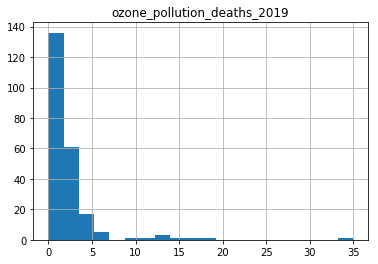

In [124]:
particulate_df.hist(column='ozone_pollution_deaths_2019', bins=20)

In [120]:
# Filter by absolute and percentage change
particulate_df[(particulate_df['ozone_pollution_deaths_2019']>5) & (particulate_df['ozone_percent_change']>-0.05)]

,Country,Code,ozone_pollution_deaths_1990,ozone_pollution_deaths_2019,ozone_percent_change,ozone_abs_change,particulate_matter_deaths_1990,particulate_matter_deaths_2019,particulate_percent_change,particulate_abs_change,household_air_deaths_1990,household_air_deaths_2019,household_percent_change,household_abs_change
22,Bhutan,BTN,12.01,14.53,0.209825,2.52,17.85,53.63,2.004482,35.78,225.90,70.04,-0.689951,-155.86
88,India,IND,14.85,18.30,0.232323,3.45,60.75,95.64,0.574321,34.89,215.54,59.59,-0.723532,-155.95
130,Myanmar,MMR,3.81,5.42,0.422572,1.61,39.69,58.30,0.468884,18.61,317.52,119.72,-0.622953,-197.80
133,Nepal,NPL,26.69,34.93,0.308730,8.24,37.72,93.91,1.489661,56.19,296.57,113.25,-0.618134,-183.32
141,North Korea,PRK,12.54,13.74,0.095694,1.20,50.18,72.51,0.444998,22.33,213.97,107.27,-0.498668,-106.70
148,Pakistan,PAK,11.54,13.93,0.207106,2.39,35.99,94.42,1.623507,58.43,203.77,92.63,-0.545419,-111.14
182,South Asia (WB),None,13.37,16.91,0.264772,3.54,52.56,91.21,0.735350,38.65,217.62,66.13,-0.696122,-151.49
185,South-East Asia Region (WHO),None,10.32,13.95,0.351744,3.63,51.50,81.78,0.587961,30.28,198.47,58.53,-0.705094,-139.94
222,World Bank Low Income,None,4.75,6.35,0.336842,1.60,22.49,37.31,0.658960,14.82,263.70,148.47,-0.436974,-115.23
223,World Bank Lower Middle Income,None,7.61,10.88,0.429698,3.27,54.40,80.97,0.488419,26.57,170.99,59.48,-0.652143,-111.51


In [189]:
particulate_df['ozone_offender'] = (particulate_df['ozone_pollution_deaths_2019']>5) & (particulate_df['ozone_percent_change']>-0.05)


### Particulate matter deaths

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ccbac50>]],
      dtype=object)

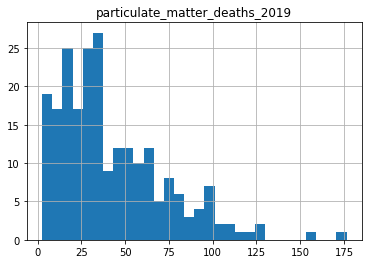

In [126]:
particulate_df.hist(column='particulate_matter_deaths_2019', bins=30)

In [129]:
particulate_df[(particulate_df['particulate_matter_deaths_2019']>50) & (particulate_df['particulate_percent_change']>-0.05)]


,Country,Code,ozone_pollution_deaths_1990,ozone_pollution_deaths_2019,ozone_percent_change,ozone_abs_change,particulate_matter_deaths_1990,particulate_matter_deaths_2019,particulate_percent_change,particulate_abs_change,household_air_deaths_1990,household_air_deaths_2019,household_percent_change,household_abs_change
0,Afghanistan,AFG,6.58,5.05,-0.232523,-1.53,30.82,56.90,0.846204,26.08,370.05,179.46,-0.515039,-190.59
12,Azerbaijan,AZE,2.48,2.37,-0.044355,-0.11,69.12,108.39,0.568142,39.27,75.86,9.39,-0.876219,-66.47
15,Bangladesh,BGD,9.57,8.85,-0.075235,-0.72,32.39,61.78,0.907379,29.39,249.29,79.25,-0.682097,-170.04
22,Bhutan,BTN,12.01,14.53,0.209825,2.52,17.85,53.63,2.004482,35.78,225.90,70.04,-0.689951,-155.86
24,Bosnia and Herzegovina,BIH,3.26,1.53,-0.530675,-1.73,57.13,63.12,0.104849,5.99,90.60,20.11,-0.778035,-70.49
25,Botswana,BWA,2.15,2.31,0.074419,0.16,37.24,73.52,0.974221,36.28,165.06,50.06,-0.696716,-115.00
32,Cameroon,CMR,2.65,2.55,-0.037736,-0.10,42.81,74.63,0.743284,31.82,163.00,84.95,-0.478834,-78.05
34,Cape Verde,CPV,0.82,0.83,0.012195,0.01,22.85,76.07,2.329103,53.22,107.34,23.60,-0.780138,-83.74
38,China,CHN,18.85,5.91,-0.686472,-12.94,77.15,81.28,0.053532,4.13,195.56,20.73,-0.893997,-174.83
41,Congo,COG,1.37,2.66,0.941606,1.29,42.93,74.06,0.725134,31.13,224.49,66.67,-0.703016,-157.82


In [191]:
particulate_df['particulate_offender'] = (particulate_df['particulate_matter_deaths_2019']>50) & (particulate_df['particulate_percent_change']>-0.05)


## Household air

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cdaf550>]],
      dtype=object)

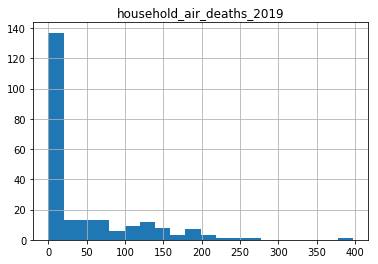

In [130]:
particulate_df.hist(column='household_air_deaths_2019', bins=20)

In [192]:
particulate_df[(particulate_df['household_air_deaths_2019']>150)]


,Country,Code,ozone_pollution_deaths_1990,ozone_pollution_deaths_2019,ozone_percent_change,ozone_abs_change,particulate_matter_deaths_1990,particulate_matter_deaths_2019,particulate_percent_change,particulate_abs_change,household_air_deaths_1990,household_air_deaths_2019,household_percent_change,household_abs_change,ozone_offender,particulate_offender
0,Afghanistan,AFG,6.58,5.05,-0.232523,-1.53,30.82,56.90,0.846204,26.08,370.05,179.46,-0.515039,-190.59,False,True
29,Burkina Faso,BFA,1.09,1.63,0.495413,0.54,14.83,25.51,0.720162,10.68,240.65,175.10,-0.272387,-65.55,False,False
30,Burundi,BDI,1.90,3.42,0.800000,1.52,19.50,18.85,-0.033333,-0.65,299.65,186.15,-0.378775,-113.50,False,False
35,Central African Republic,CAF,7.86,6.46,-0.178117,-1.40,25.63,34.25,0.336325,8.62,326.19,251.24,-0.229774,-74.95,False,False
36,Chad,TCD,2.47,2.71,0.097166,0.24,15.98,28.47,0.781602,12.49,263.07,195.55,-0.256662,-67.52,False,False
49,Democratic Republic of Congo,COD,3.32,4.19,0.262048,0.87,24.72,30.26,0.224110,5.54,249.66,156.92,-0.371465,-92.74,False,False
81,Guinea,GIN,1.11,2.46,1.216216,1.35,21.11,34.27,0.623401,13.16,268.50,184.96,-0.311136,-83.54,False,False
82,Guinea-Bissau,GNB,1.21,2.43,1.008264,1.22,29.01,44.23,0.524647,15.22,317.66,198.90,-0.373859,-118.76,False,False
84,Haiti,HTI,2.50,1.70,-0.320000,-0.80,18.00,26.40,0.466667,8.40,294.04,173.45,-0.410114,-120.59,False,False
100,Kiribati,KIR,1.51,3.25,1.152318,1.74,20.26,26.46,0.306022,6.20,302.19,193.46,-0.359807,-108.73,False,False


In [193]:
particulate_df['household_offender'] = (particulate_df['household_air_deaths_2019']>150)

## Sustainable forest management
15.2.1 - Annual forest area change rate (%) - AG_LND_FRSTCHG

In [138]:
forest = pd.read_csv('forest-area-net-change-rate.csv')

In [170]:
col_list = []
for col in forest.columns:
    col_list.append(col)
col_list[3] = "area_change_perc"
forest.columns = col_list

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ce9eb90>]],
      dtype=object)

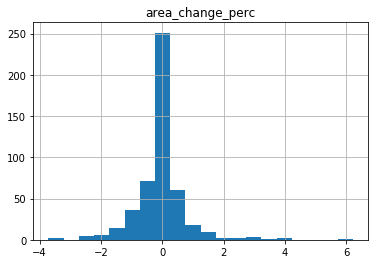

In [175]:
forest.hist(column='area_change_perc', bins=20)

In [194]:
forest[(forest['area_change_perc']<-1.5)&(forest['Year']==2020)]

,Entity,Code,Year,area_change_perc
71,Cambodia,KHM,2020,-2.68
85,Chad,TCD,2020,-2.45
101,Cote d'Ivoire,CIV,2020,-3.29
127,Egypt,EGY,2020,-3.71
159,Gambia,GMB,2020,-2.10
253,Malawi,MWI,2020,-1.70
267,Mauritania,MRT,2020,-1.59
301,Nicaragua,NIC,2020,-2.04
319,Northern Mariana Islands,MNP,2020,-2.16
325,Oman,OMN,2020,-1.81


In [195]:
forest['forest_offender'] = (forest['area_change_perc']<-1.5)&(forest['Year']==2020)

## Sustainable forest management

TODO: This one has like 5 tables, check how it overlaps with the prior one



## Unsafe water 
#### SDG INDICATOR 3.9.2
Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene from diarrhoea, intestinal nematode infections, malnutrition and acute respiratory infections (deaths per 100,000 population) - SH_STA_WASHARI


In [159]:
water = pd.read_csv('mortality-rate-attributable-to-wash.csv')

In [172]:
col_list = []
for col in water.columns:
    col_list.append(col)
col_list[3] = "mortality_rate"
water.columns = col_list

In [173]:
water.head(5)

,Entity,Code,Year,mortality_rate
0,Afghanistan,AFG,2019,16.64
1,Algeria,DZA,2019,4.05
2,Angola,AGO,2019,48.85
3,Antigua and Barbuda,ATG,2019,2.47
4,Argentina,ARG,2019,11.45


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cdaf910>]],
      dtype=object)

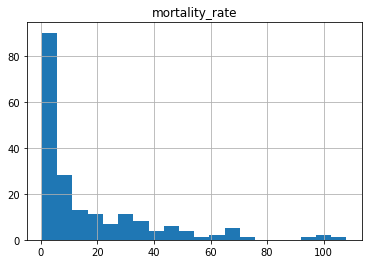

In [179]:
water.hist(column='mortality_rate', bins=20)

In [181]:
water[(water['mortality_rate']>60)]

,Entity,Code,Year,mortality_rate
17,Benin,BEN,2019,60.18
25,Burkina Faso,BFA,2019,60.91
31,Central African Republic,CAF,2019,97.01
33,Chad,TCD,2019,99.20
54,Eritrea,ERI,2019,66.53
98,Lesotho,LSO,2019,108.06
107,Mali,MLI,2019,66.12
124,Niger,NER,2019,70.26
125,Nigeria,NGA,2019,71.73
153,Sierra Leone,SLE,2019,69.54


In [196]:
water['water_offender'] = (water['mortality_rate']>60)

## End desertification and land degradation
#### SDG INDICATOR 15.3.1
Proportion of land that is degraded over total land area (%) - AG_LND_DGRD

In [182]:
desert = pd.read_csv('share-degraded-land.csv')

In [184]:
col_list = []
for col in desert.columns:
    col_list.append(col)
col_list[3] = "degraded_land_perc"
desert.columns = col_list

In [185]:
desert

,Entity,Code,Year,degraded_land_perc
0,Afghanistan,AFG,2015,8
1,Africa (UN),NaN,2015,18
2,Algeria,DZA,2015,1
3,Angola,AGO,2015,20
4,Argentina,ARG,2015,39
...,...,...,...,...
130,Vietnam,VNM,2015,31
131,Western Sahara,ESH,2015,19
132,World,OWID_WRL,2015,20
133,Zambia,ZMB,2015,7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d037e10>]],
      dtype=object)

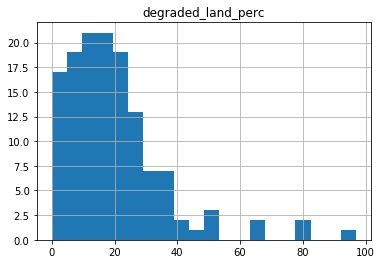

In [186]:
desert.hist(column='degraded_land_perc', bins=20)

In [197]:
desert[(desert['degraded_land_perc']>35)]

,Entity,Code,Year,degraded_land_perc
4,Argentina,ARG,2015,39
7,Bangladesh,BGD,2015,65
10,Belize,BLZ,2015,81
11,Benin,BEN,2015,53
15,Botswana,BWA,2015,51
63,Kazakhstan,KAZ,2015,36
64,Kenya,KEN,2015,40
65,Kuwait,KWT,2015,64
80,Mexico,MEX,2015,47
96,Paraguay,PRY,2015,52


In [198]:
desert['desert_offender'] = (desert['degraded_land_perc']>35)

## Unify tables

In [200]:
all_offenders_df = sqldf(""" select a.Country, ozone_offender, particulate_offender, household_offender, 
                        forest_offender, water_offender, desert_offender
                    from particulate_df a
                    join forest b on (a.Country=b.Entity and b.Year=2020)
                    join water c on (a.Country =c.Entity)
                    join desert d on (a.Country=d.Entity)
                """)

In [201]:
all_offenders_df

,Country,ozone_offender,particulate_offender,household_offender,forest_offender,water_offender,desert_offender
0,Afghanistan,0,1,1,0,0,0
1,Algeria,0,0,0,0,0,0
2,Angola,0,0,0,0,0,0
3,Argentina,0,0,0,0,0,1
4,Armenia,0,0,0,0,0,0
...,...,...,...,...,...,...,...
116,Venezuela,0,0,0,0,0,0
117,Vietnam,0,0,0,0,0,0
118,World,0,1,0,0,0,0
119,Zambia,0,0,0,0,0,0


In [202]:
all_df_data = sqldf(""" select *
                    from particulate_df a
                    join forest b on (a.Country=b.Entity and b.Year=2020)
                    join water c on (a.Country =c.Entity)
                    join desert d on (a.Country=d.Entity)
                """)

In [207]:
all_df_data.columns

Index(['Country', 'Code', 'ozone_pollution_deaths_1990',
       'ozone_pollution_deaths_2019', 'ozone_percent_change',
       'ozone_abs_change', 'particulate_matter_deaths_1990',
       'particulate_matter_deaths_2019', 'particulate_percent_change',
       'particulate_abs_change', 'household_air_deaths_1990',
       'household_air_deaths_2019', 'household_percent_change',
       'household_abs_change', 'ozone_offender', 'particulate_offender',
       'household_offender', 'Entity', 'Code', 'Year', 'area_change_perc',
       'forest_offender', 'Entity', 'Code', 'Year', 'mortality_rate',
       'water_offender', 'Entity', 'Code', 'Year', 'degraded_land_perc',
       'desert_offender'],
      dtype='object')

In [212]:
all_df_data = all_df_data.drop(all_df_data.columns[[17, 18, 19, 22, 23, 24, 27, 28, 29]],axis = 1)

In [213]:
all_df_data

,Country,ozone_pollution_deaths_1990,ozone_pollution_deaths_2019,ozone_percent_change,ozone_abs_change,particulate_matter_deaths_1990,particulate_matter_deaths_2019,particulate_percent_change,particulate_abs_change,household_air_deaths_1990,...,household_abs_change,ozone_offender,particulate_offender,household_offender,area_change_perc,forest_offender,mortality_rate,water_offender,degraded_land_perc,desert_offender
0,Afghanistan,6.58,5.05,-0.232523,-1.53,30.82,56.90,0.846204,26.08,370.05,...,-190.59,0,1,1,0.00,0,16.64,0,8,0
1,Algeria,3.05,2.59,-0.150820,-0.46,103.24,76.53,-0.258718,-26.71,28.32,...,-28.09,0,0,0,0.16,0,4.05,0,1,0
2,Angola,4.71,2.07,-0.560510,-2.64,17.73,45.04,1.540327,27.31,260.34,...,-191.95,0,0,0,-0.80,0,48.85,0,20,0
3,Argentina,0.68,0.95,0.397059,0.27,36.85,23.24,-0.369335,-13.61,12.87,...,-11.56,0,0,0,-0.56,0,11.45,0,39,1
4,Armenia,4.19,3.89,-0.071599,-0.30,87.41,77.52,-0.113145,-9.89,38.49,...,-36.51,0,0,0,-0.06,0,5.83,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Venezuela,0.62,0.64,0.032258,0.02,47.93,44.16,-0.078656,-3.77,3.72,...,-3.41,0,0,0,-0.27,0,5.17,0,15,0
117,Vietnam,1.14,1.75,0.535088,0.61,24.36,44.81,0.839491,20.45,152.81,...,-112.43,0,0,0,0.90,0,6.92,0,31,0
118,World,6.00,4.70,-0.216667,-1.30,53.15,52.67,-0.009031,-0.48,100.08,...,-69.93,0,1,0,-0.12,0,18.21,0,20,0
119,Zambia,1.68,1.99,0.184524,0.31,20.10,38.62,0.921393,18.52,214.93,...,-103.82,0,0,0,-0.41,0,35.77,0,7,0


In [214]:
all_df_data.to_csv('all_data.csv')